In [1]:


import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/hospital-readmissions/hospital_readmissions.csv


**Load dataset and analyse**

In [2]:
file = '/kaggle/input/hospital-readmissions/hospital_readmissions.csv'
df = pd.read_csv(file)


In [3]:
df.shape

(25000, 17)

In [4]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [18]:
df.info

<bound method DataFrame.info of            age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24995  [80-90)                14                77             1   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24998  [70-80)                 2                61             3   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13   

In [7]:
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [9]:
df.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [14]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

****EDA****

Numeric feature analysis

"time_in_hospital" - days (from 1 to 14)

"n_procedures" - number of procedures performed during the hospital stay

"n_lab_procedures" - number of laboratory procedures performed during the hospital stay

"n_medications" - number of medications administered during the hospital stay

"n_outpatient" - number of outpatient visits in the year before a hospital stay

"n_inpatient" - number of inpatient visits in the year before the hospital stay

"n_emergency" - number of visits to the emergency room in the year before the hospital stay

"medical_specialty" - the specialty of the admitting physician

In [15]:
num_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', \
                'n_outpatient', 'n_inpatient', 'n_emergency']

In [17]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


<Figure size 640x480 with 0 Axes>

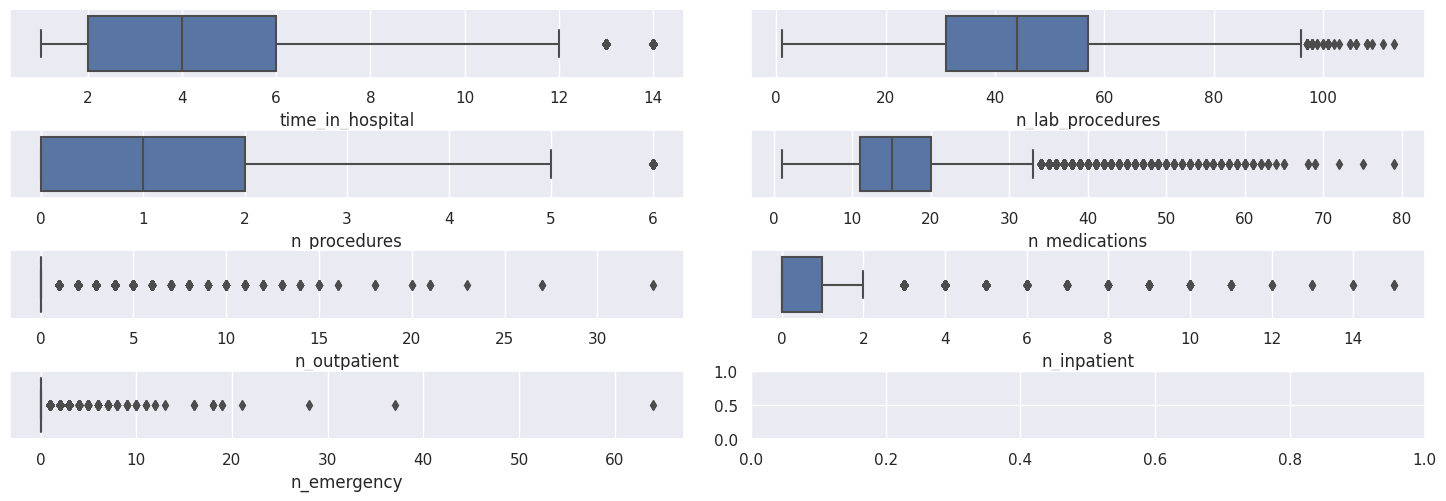

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_theme()
# plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.3, wspace = 0.7)
fig, axs = plt.subplots(4, 2, figsize=(15, 5))
fig.tight_layout()

# ax = plt.subplot(0, 0, 4)

# filter df and plot ticker on the new subplot axis
sns.boxplot(data = df, x = 'time_in_hospital', ax = axs[0, 0])
sns.boxplot(data = df, x = 'n_lab_procedures', ax = axs[0, 1])
sns.boxplot(data = df, x = 'n_procedures', ax = axs[1, 0])
sns.boxplot(data = df, x = 'n_medications', ax = axs[1, 1])
sns.boxplot(data = df, x = 'n_outpatient', ax = axs[2, 0])
sns.boxplot(data = df, x = 'n_inpatient', ax = axs[2, 1])
sns.boxplot(data = df, x = 'n_emergency', ax = axs[3, 0])

# fig.subplots_adjust(wspace=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

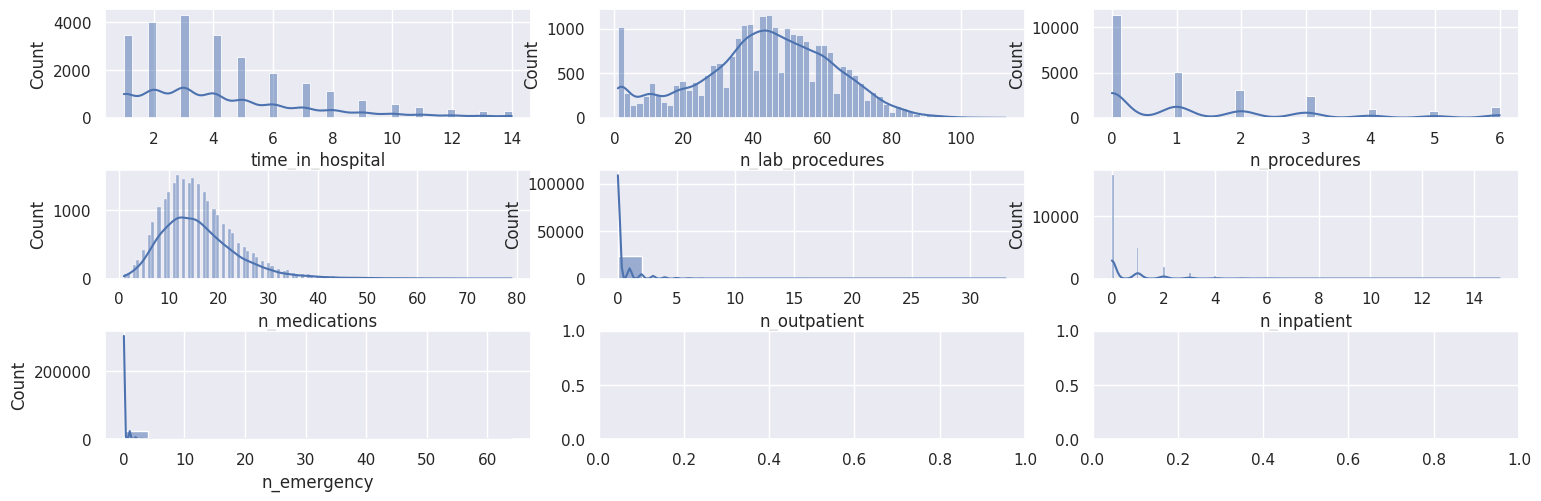

In [21]:
# sns.histplot(df['time_in_hospital'], kde=True)
fig, axs = plt.subplots(3, 3, figsize=(15, 5))
fig.tight_layout()

sns.histplot(data = df, x = 'time_in_hospital', ax = axs[0, 0], kde = True)
sns.histplot(data = df, x = 'n_lab_procedures', ax = axs[0, 1], kde = True)
sns.histplot(data = df, x = 'n_procedures', ax = axs[0, 2], kde = True)
sns.histplot(data = df, x = 'n_medications', ax = axs[1, 0], kde = True)
sns.histplot(data = df, x = 'n_outpatient', ax = axs[1, 1], kde = True)
sns.histplot(data = df, x = 'n_inpatient', ax = axs[1, 2], kde = True)
sns.histplot(data = df, x = 'n_emergency', ax = axs[2, 0], kde = True)

plt.show()

<Axes: >

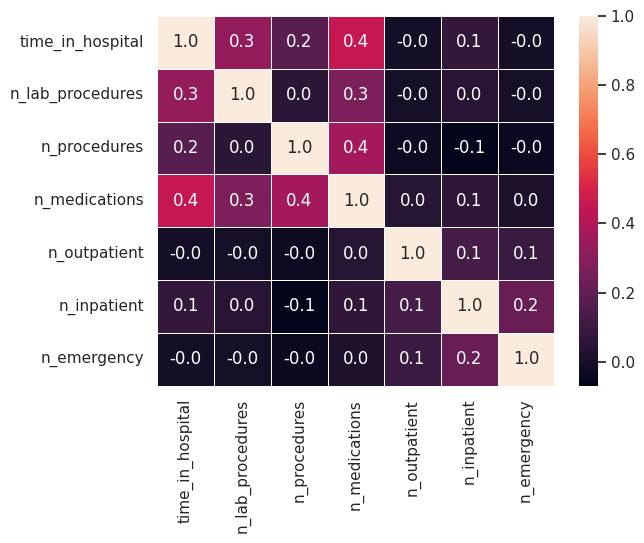

In [22]:
sns.heatmap(df[num_features].corr(), annot=True, linewidth=.5, fmt=".1f")

****Categorical Analysis****

"age" - age bracket of the patient

"medical_specialty" - the specialty of the admitting physician

"diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)

"diag_2" - secondary diagnosis

"diag_3" - additional secondary diagnosis

"glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed

"A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed

"change" - whether there was a change in the diabetes medication ('yes' or 'no')

"diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')

"readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

In [23]:
cat_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', \
                'A1Ctest', 'change', 'diabetes_med', 'readmitted']

<Axes: xlabel='count', ylabel='readmitted'>

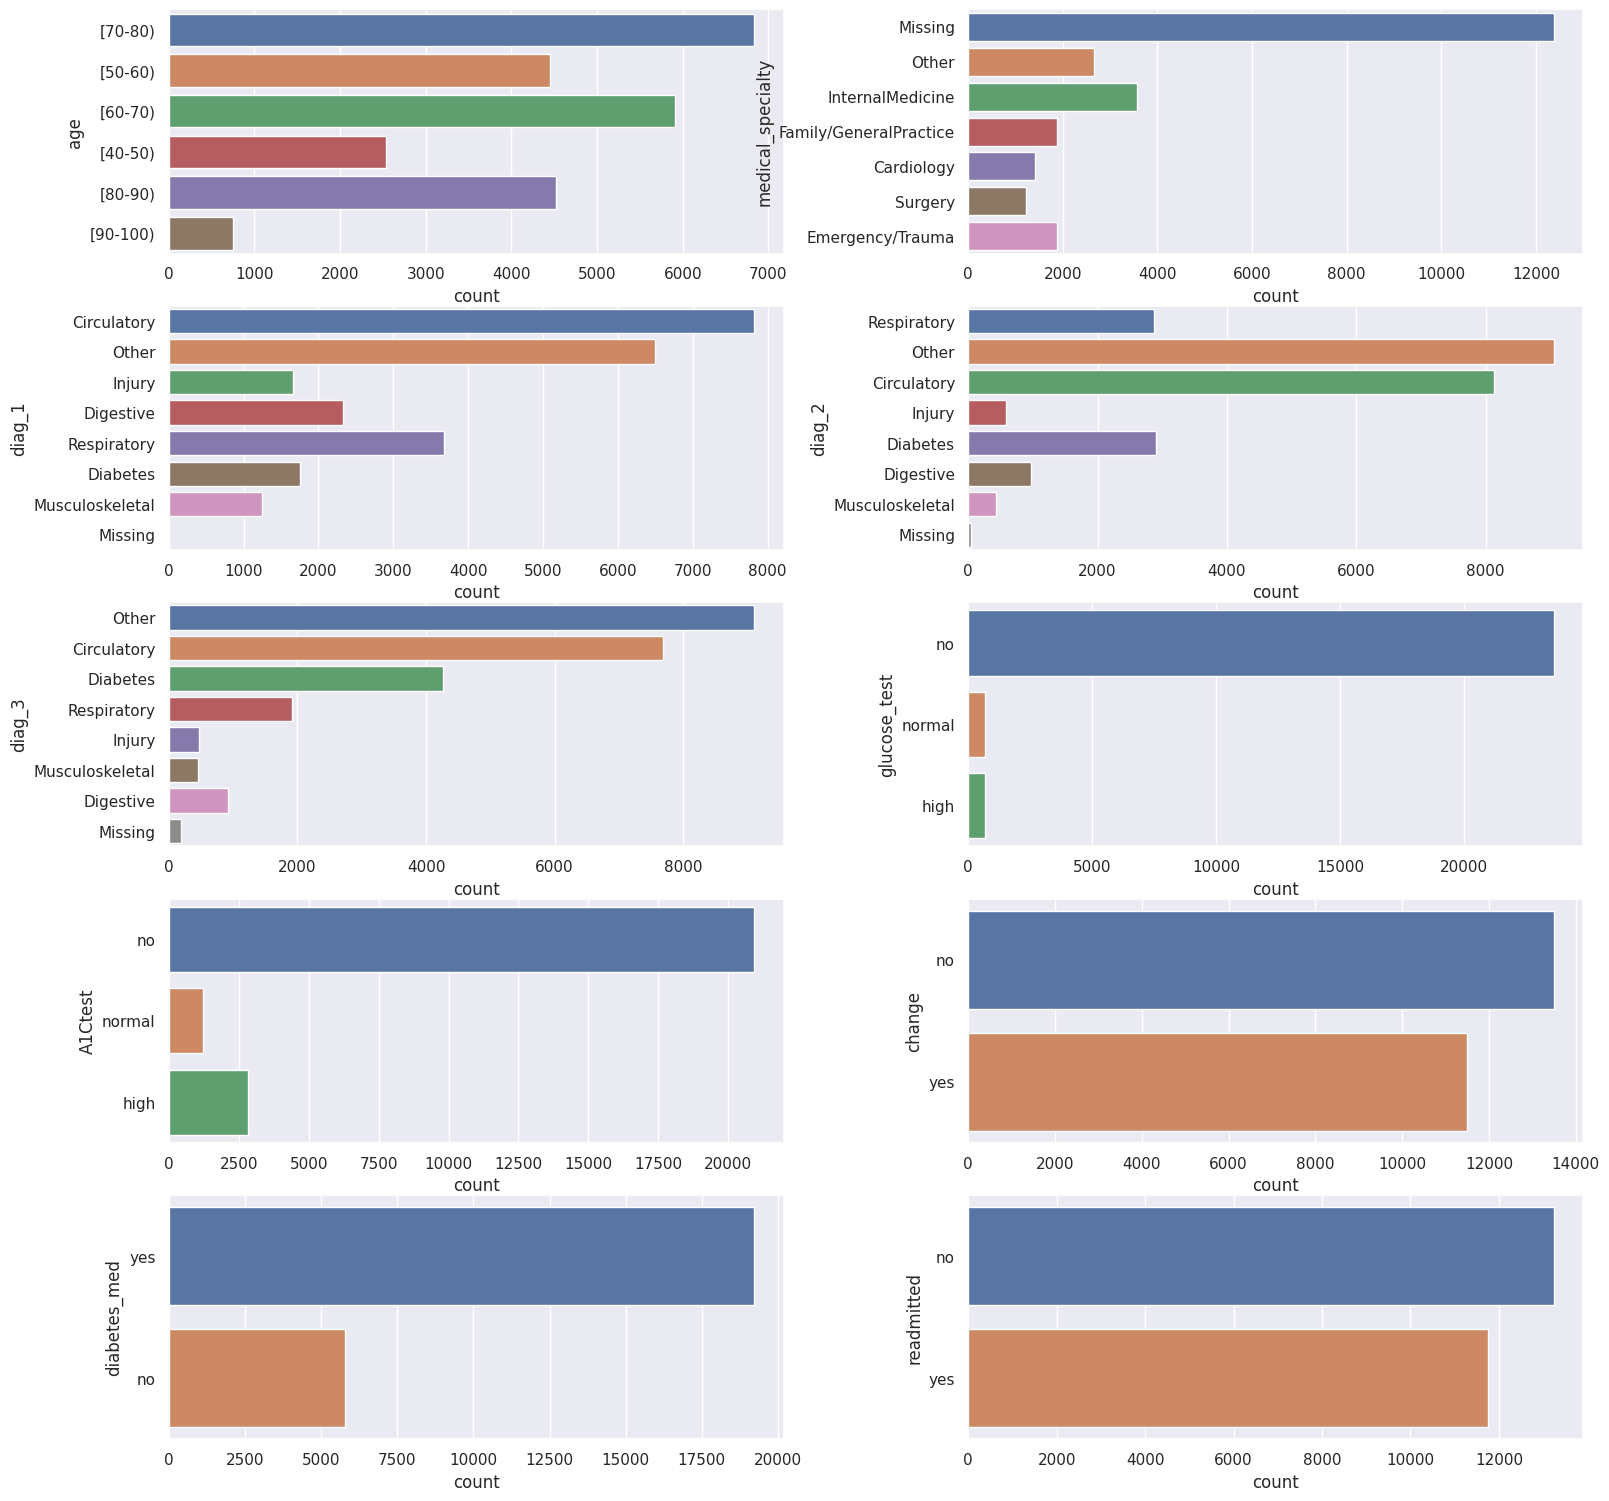

In [24]:
fig, axs = plt.subplots(5, 2, figsize=(15, 15))
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

sns.countplot(data = df, y = 'age', ax = axs[0, 0])
sns.countplot(data = df, y = 'medical_specialty', ax = axs[0, 1])
# axs[0, 1].tick_params(rotation= 15)
sns.countplot(data = df, y = 'diag_1', ax = axs[1, 0])
sns.countplot(data = df, y = 'diag_2', ax = axs[1, 1])
sns.countplot(data = df, y = 'diag_3', ax = axs[2, 0])
sns.countplot(data = df, y = 'glucose_test', ax = axs[2, 1])
sns.countplot(data = df, y = 'A1Ctest', ax = axs[3, 0])
sns.countplot(data = df, y = 'change', ax = axs[3, 1])
sns.countplot(data = df, y = 'diabetes_med', ax = axs[4, 0])
sns.countplot(data = df, y = 'readmitted', ax = axs[4, 1])

In [27]:
df1=df

In [28]:
df1['change'] = df1['change'].replace({'yes': 1, 'no': 0})
df1['diabetes_med'] = df1['diabetes_med'].replace({'yes': 1, 'no': 0})
df1['readmitted'] = df1['readmitted'].replace({'yes': 1, 'no': 0})
df1

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,1
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,1
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,1
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0


**Relationship between numerical variables and target variable**

<Axes: >

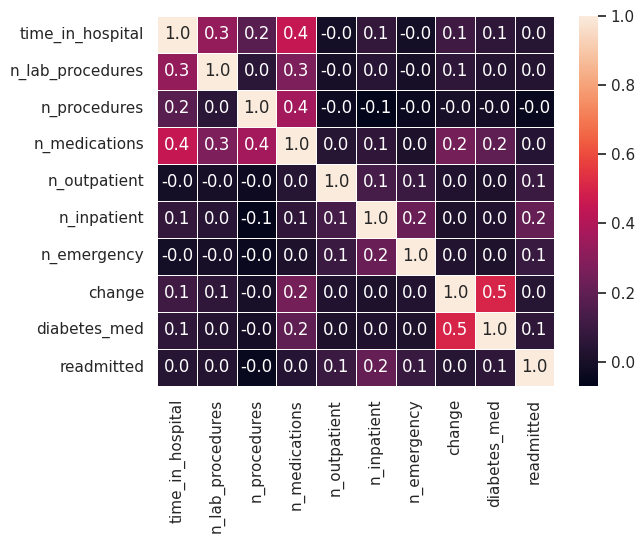

In [33]:
num_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', \
                'n_outpatient', 'n_inpatient', 'n_emergency']
num_target = num_features + ['change', 'diabetes_med', 'readmitted']
sns.heatmap(df1[num_target].corr(), annot=True, linewidth=.5, fmt=".1f")

<Figure size 640x480 with 0 Axes>

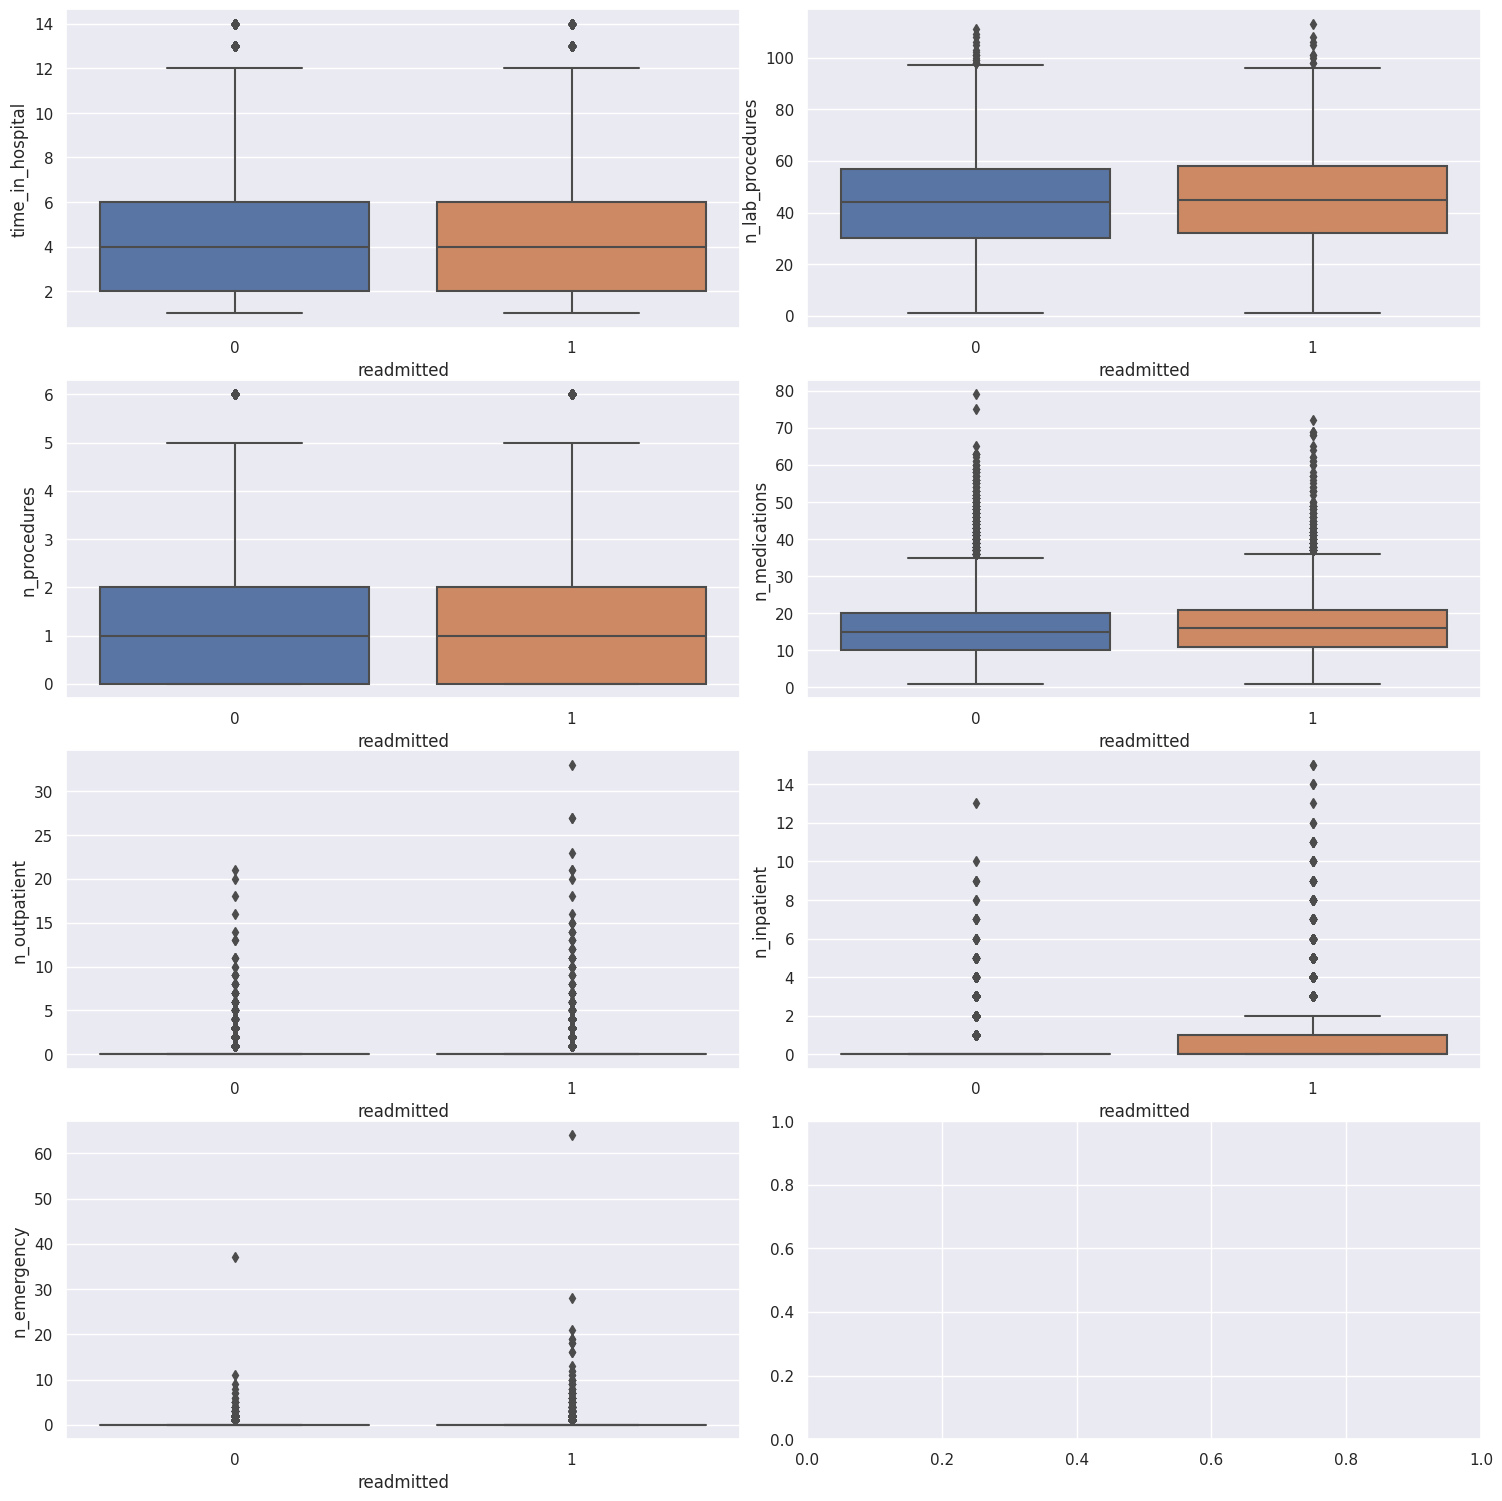

In [34]:
plt.subplots_adjust(hspace=0.3, wspace = 0.7)
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.tight_layout()

# ax = plt.subplot(0, 0, 4)

# filter df and plot ticker on the new subplot axis
sns.boxplot(data = df1, y = 'time_in_hospital', x = 'readmitted', ax = axs[0, 0])
sns.boxplot(data = df1, y = 'n_lab_procedures', x = 'readmitted',ax = axs[0, 1])
sns.boxplot(data = df1, y = 'n_procedures', x = 'readmitted',ax = axs[1, 0])
sns.boxplot(data = df1, y = 'n_medications', x = 'readmitted',ax = axs[1, 1])
sns.boxplot(data = df1, y = 'n_outpatient', x = 'readmitted',ax = axs[2, 0])
sns.boxplot(data = df1, y = 'n_inpatient', x = 'readmitted',ax = axs[2, 1])
sns.boxplot(data = df1, y = 'n_emergency', x = 'readmitted',ax = axs[3, 0])

# fig.subplots_adjust(wspace=0.5)
plt.show()

**Relationship between categorical variable and target variable**


<Axes: xlabel='count', ylabel='diabetes_med'>

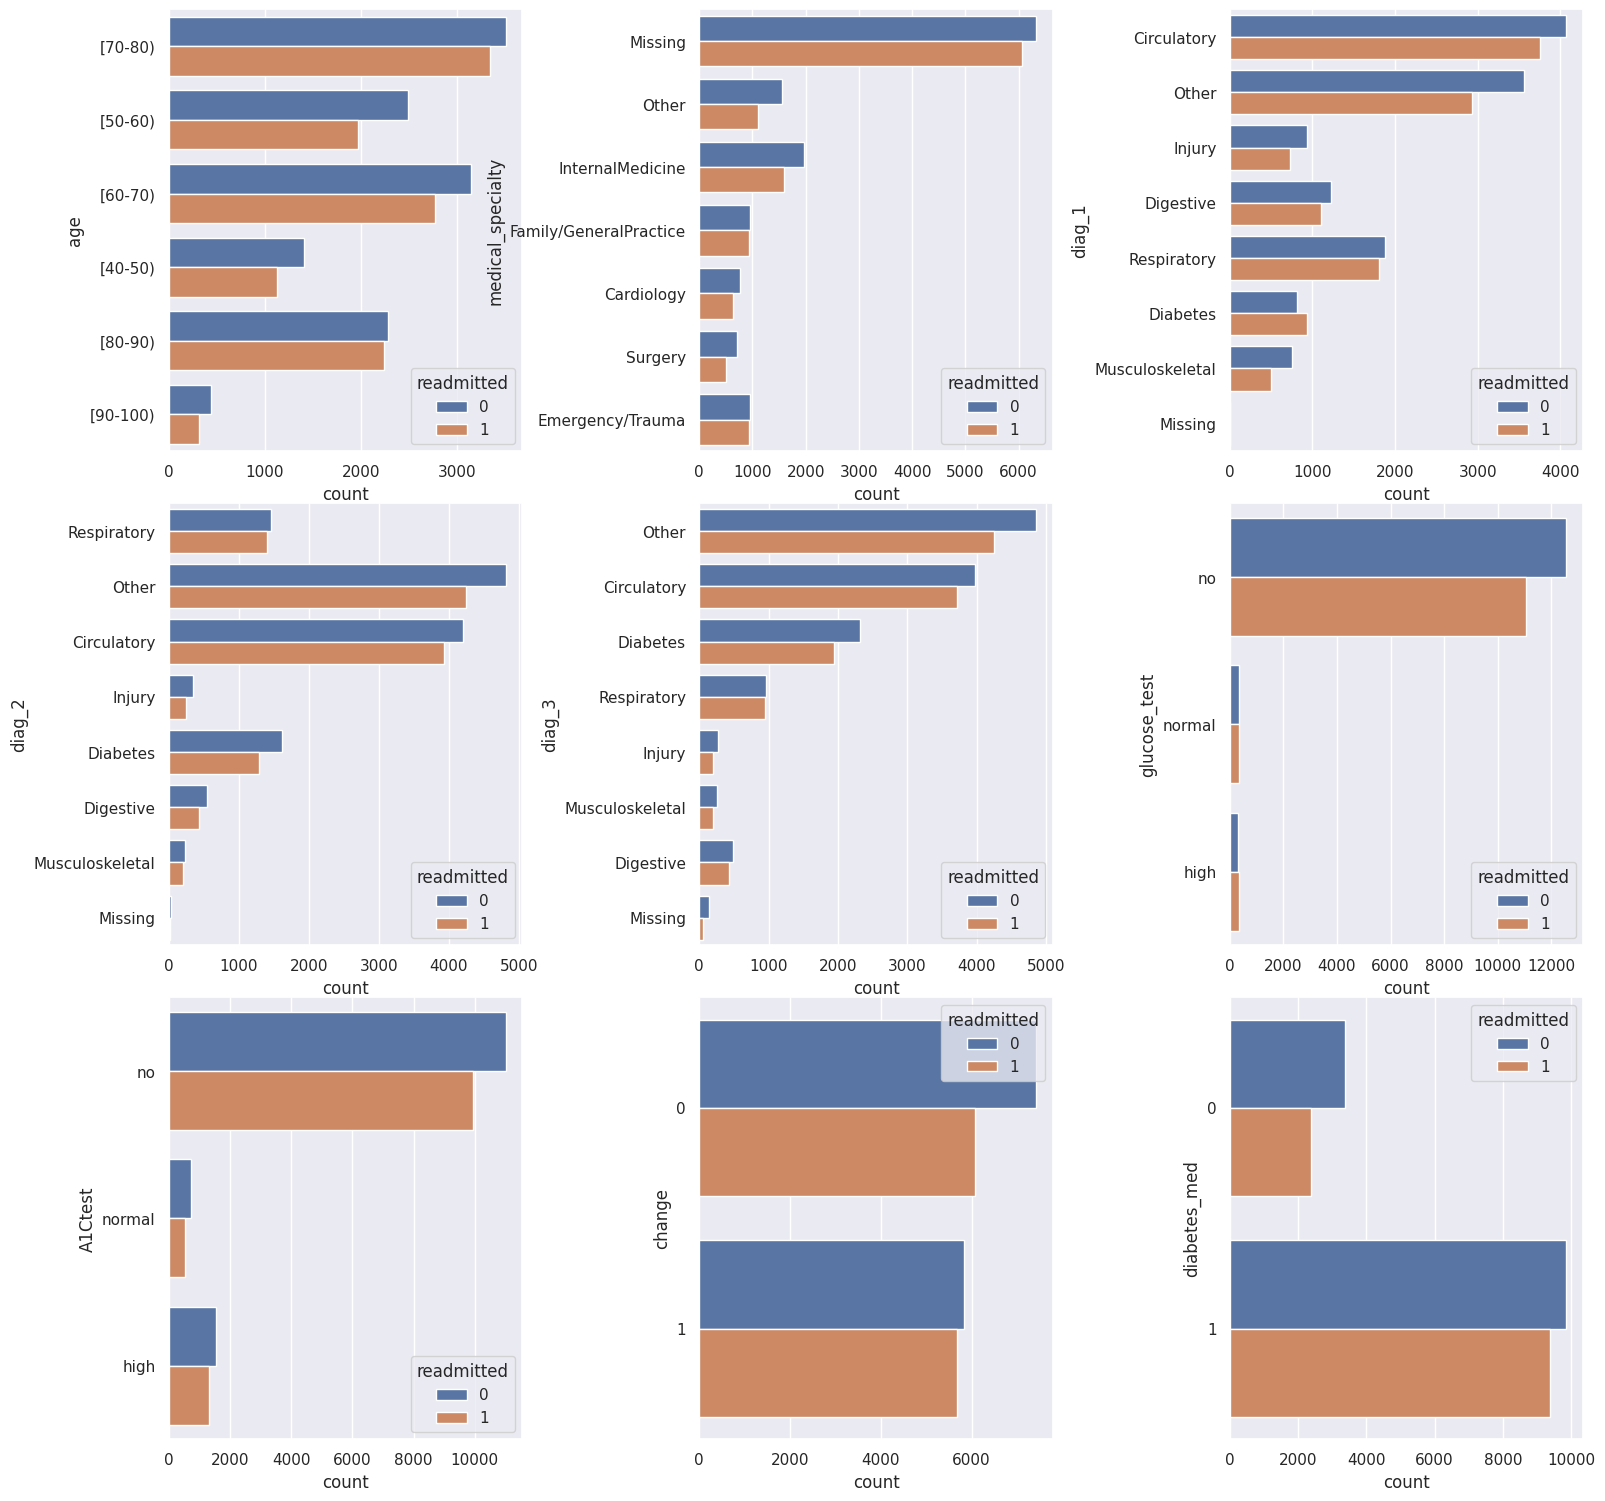

In [36]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout()
plt.subplots_adjust(wspace=0.5)

sns.countplot(data = df1, y = 'age', hue = 'readmitted', ax = axs[0, 0])
sns.countplot(data = df1, y = 'medical_specialty', hue = 'readmitted',ax = axs[0, 1])
# axs[0, 1].tick_params(rotation= 15)
sns.countplot(data = df1, y = 'diag_1', hue = 'readmitted',ax = axs[0, 2])
sns.countplot(data = df1, y = 'diag_2', hue = 'readmitted',ax = axs[1, 0])
sns.countplot(data = df1, y = 'diag_3', hue = 'readmitted',ax = axs[1, 1])
sns.countplot(data = df1, y = 'glucose_test', hue = 'readmitted',ax = axs[1, 2])
sns.countplot(data = df1, y = 'A1Ctest', hue = 'readmitted',ax = axs[2, 0])
sns.countplot(data = df1, y = 'change', hue = 'readmitted',ax = axs[2, 1])
sns.countplot(data = df1, y = 'diabetes_med', hue = 'readmitted',ax = axs[2, 2])
#sns.countplot(data = df1, y = 'readmitted', ax = axs[4, 1])

**Preprocess categorical fetureas**

In [37]:
from sklearn.preprocessing import LabelEncoder

le = dict()
data = pd.DataFrame()

for feat in ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test','A1Ctest']:
    le[feat] = LabelEncoder()
    data[feat] = le[feat].fit_transform(df1[feat])
    
data

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest
0,3,4,0,7,6,1,1
1,3,5,6,6,6,1,1
2,1,4,0,0,0,1,1
3,3,4,0,6,1,1,1
4,2,3,6,0,7,1,1
...,...,...,...,...,...,...,...
24995,4,4,0,6,0,1,2
24996,4,4,2,3,6,1,0
24997,3,4,6,6,6,2,1
24998,3,2,7,1,6,1,1


In [38]:
for feat in num_target: 
    data[feat] = df[feat]

data    

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,change,diabetes_med,readmitted
0,3,4,0,7,6,1,1,8,72,1,18,2,0,0,0,1,0
1,3,5,6,6,6,1,1,3,34,2,13,0,0,0,0,1,0
2,1,4,0,0,0,1,1,5,45,0,18,0,0,0,1,1,1
3,3,4,0,6,1,1,1,2,36,0,12,1,0,0,1,1,1
4,2,3,6,0,7,1,1,1,42,0,7,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,4,0,6,0,1,2,14,77,1,30,0,0,0,0,0,1
24996,4,4,2,3,6,1,0,2,66,0,24,0,0,0,1,1,1
24997,3,4,6,6,6,2,1,5,12,0,6,0,1,0,0,0,1
24998,3,2,7,1,6,1,1,2,61,3,15,0,0,0,1,1,0


**Model**

In [40]:
features = data.columns[:-1]
X = data[features]
y = data['readmitted']

**Train and test split**

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17500, 16), (7500, 16), (17500,), (7500,))

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**SVM**

In [48]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'sigmoid', gamma='auto'))
clf.fit(X_train, y_train)

88y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2296 1704]
 [1734 1766]]
0.5416
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      4000
           1       0.51      0.50      0.51      3500

    accuracy                           0.54      7500
   macro avg       0.54      0.54      0.54      7500
weighted avg       0.54      0.54      0.54      7500



****Logistic Regression****

In [49]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3145  855]
 [2089 1411]]
0.6074666666666667
              precision    recall  f1-score   support

           0       0.60      0.79      0.68      4000
           1       0.62      0.40      0.49      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.59      0.59      7500
weighted avg       0.61      0.61      0.59      7500



**Random Forest**

In [51]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[2922 1078]
 [1819 1681]]
0.6137333333333334
              precision    recall  f1-score   support

           0       0.62      0.73      0.67      4000
           1       0.61      0.48      0.54      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.61      0.60      7500
weighted avg       0.61      0.61      0.61      7500



**XGBoost**

In [52]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective="binary:logistic")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2691 1309]
 [1689 1811]]
0.6002666666666666
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      4000
           1       0.58      0.52      0.55      3500

    accuracy                           0.60      7500
   macro avg       0.60      0.60      0.59      7500
weighted avg       0.60      0.60      0.60      7500



**Cross validated XGBoost**

In [53]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5, scoring="accuracy")

grid_cv.fit(X, y)

print(grid_cv.best_score_)
print(grid_cv.best_params_)


0.6189600000000001
{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 1, 'subsample': 0.8}
